# Analysis of TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The objective of this project is to go through the general data analysis process — using basic data analysis techniques with NumPy, pandas, and Matplotlib.I will fist import the Python libraries necessary for data analysis - NumPy, Pandas, Matplotlib, and Seaborn. 

Once the required libraries are imported into the workspace, the next step will be to load the dataset from the CSV file **'tmdb-movies.csv'**. After cleaning this data, the data analysis process involves finding trends in the cleaned dataset to answer research questions.

For the purpose of this project, I will be analyzing which factors a movie's popularity is dependent on, and how these trends have varied from year to year.

In [239]:
#importing the requiured packages and loading the movie dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_movie=pd.read_csv('tmdb-movies.csv')
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The dataset has 21 columns with details about movies that were released, and include details about its popularity, director, cast, budget, revenue, and the year it released.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In this section, I will be examining some basic properties in the dataset, such as its dimensions, the data types of each column, and some basic descriptive statistics associated with it.

In [126]:
#Dimensions of the data frame
df_movie.shape

(10866, 21)

This data has over 10,000 rows and 21 columns. Each row represents the details of a particular movie release. In the next cell, I will get an overview of this data by column.

In [240]:
#General information about the data
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the output of the df.info(), it can be observed that the majority of the columns are of Python Object data type, while the others have int or float data types and contain numerical data.

The number of non-null values are listed column-wise. It is evident that there are many rows have columns have null values, which could impact the analysis.

It can also be observed that a few columns like **genres, cast,**, and **keywords** have multiple string values for each movie seperated by a '|'. These columns will be examined in a later section but will be kept as is during the data cleaning stage.

In [129]:
#data types of each column
df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [128]:
#descriptive statistics about the movie dataset
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the descriptive statistics of this data, we can infer the following details:
1. There are over 10,000 rows and 21 columns records in the movie dataset.
2. The dataset contains details of movies which have released between the years 1960 and 2015.
3. The popularity value for a movie ranges from 0.000065 to 32.9.
4. The runtime of the movies ranges from 0 to nearly 10,000 minutes.
5. The average runtime of a movie is 102 minutes.
6. The average budget of a movie(assumed to be in US Dollars) is $1.4 million.

In addition to many nulls in this dataset, it also contains many non-null zero values in the budget, revenue, and runtime columns. These zero values can impact statistical calculations for this data and have to be handled.

Rows and columns with zero or null values should either be dropped or filled in with an updated value.

## Data Cleaning

This section outlines the data cleaning process, which consists of these steps:
1. Count of null and zero values in the dataset
2. Dropping columns that are not relevant for this analysis
3. Filling in or dropping data that contains nulls or zeros
4. Checking for and dropping duplicate entries in the dataset

### Dealing With Null Values and Missing Data

First, I will be counting the number of null values in the dataset by column.

In [130]:
#Count of null values in the dataset by column
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From the above output, it can be seen that the **homepage**,**tagline**, **keywords**, and **production_companies** columns have a over a thousand null values, suggesting that there is missing data. 

The **genres**, **director**, **overview**, **imdb_id**, and **cast** columns have a smaller number of nulls values, less than a hundred null values in the data.

Dropping all the rows or columns with null values could lead to losing data that would be useful for analysis, so I will try to fill in as much missing data as possible before making the decision on dropping nulls by row or column.

Using the pandas **query()** method to retrieve the zero values in the **budget**, **revenue**, and **runtime** columns:

In [241]:
#filter the zero budget data
df_movie.query('budget == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [132]:
#filter the zero revenue data
df_movie.query('revenue == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


In [133]:
#filter the zero runtime data
df_movie.query('runtime == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


1. There are 5696 rows in the dataset where the budget value is 0.
2. There are 6016 rows in the dataset where the revenue value is 0.
3. There are 31 rows in the dataset where the runtime value is 0.

In the next few cells, I will be replacing all the zeros in the budget, revenue, and runtime columns with nulls(NaN).
Since there are thousands of nulls/zeros in the budget and revenue columns, I will replace the nulls in these columns with their mean value. 

Replace zeros with nulls:

In [242]:
#replace 0 values in budget column with NaN
df_movie['budget'].replace(0,np.nan, inplace=True)

In [243]:
#replace 0 values in revenue column with NaN
df_movie['revenue'].replace(0,np.nan, inplace=True)

In [246]:
#replace zero values with NaN in runtime column
df_movie['runtime'].replace(0,np.nan, inplace=True)

Fill in nulls with mean value

In [244]:
#fill in null values in budget column with mean 
mean_budget=df_movie['budget'].mean()
df_movie['budget'].fillna(mean_budget, inplace=True)

In [245]:
#fill in null values in revenue column with mean 
mean_revenue=df_movie['revenue'].mean()
df_movie['revenue'].fillna(mean_revenue, inplace=True)

Since the number of nulls in the **runtime** column are less compared to the budget and revenue columns, I will drop rows that have nulls in this column.

In [247]:
#count of null values in updated dataset
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

After filling in the missing data, it can be seen that there are a few columns that still have thousands of nulls. 
I will drop the **imdb_id, overview, homepage, tagline, budget_adj,** and **revenue_adj** columns since they will not be used in the analysis and because they have a large number of null values. 

In [140]:
#dropping columns with too many null values, which will not be useful for analysis
df_movie.drop(columns=['imdb_id','overview','homepage','tagline', 'budget_adj', 'revenue_adj'],axis=1,inplace=True)

Checking the count of nulls in the data after dropping columns and filling in missing data:

In [141]:
#checking for null values
df_movie.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

The **cast, director, keywords, runtime, genres,** and **production_companies** columns still contain nulls and I will drop 
rows that contain nulls in these columns.

In [ ]:
#dropping rows that have a zero value in the runtime column
df_movie.dropna(axis=0, how='any',inplace=True)

Finding the dimensions of the updated dataset after cleaning:

In [143]:
df_movie.shape

(8660, 15)

Final check of null values:

In [144]:
#checking for nulls again
df_movie.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

### Duplicates

Next, I will be checking for duplicate rows in the dataset.

In [145]:
#count number of duplicates in dataset
sum(df_movie.duplicated())

1

There is one duplicate row in this data, which will be dropped from the **df_movie** dataframe.

In [146]:
#remove duplicates
df_movie.drop_duplicates(inplace=True)

Finding dimensions of cleaned dataset:

In [147]:
df_movie.shape

(8659, 15)

The cleaned data contains 8659 rows and 15 columns, that have columns relevant for observation and no null or duplicate rows.

In [148]:
#exporting cleaned dataset to csv file
df_movie.to_csv('tmdb-clean.csv', index=False)

### Data Cleaning Summary 

The data cleaning process consisted of dropping columns that aren't useful for analysis, filling in missing data, dropping nulls, and removing duplicate data. 



The dimensions of final cleaned dataset are: 
**_8659 rows x 15 columns_**

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data has been cleaned, I can now analyze the dataset for trends in movie releases.

I propose the following questions in this analysis:
1. How are budget and revenue of a movie correlated?
2. Which movies have the shortest and longest runtimes?
3. How does Runtime influence the popularity of  a movie?
4. Who are the top 5 directors who directed the most number of movies?
5. Which genre has the highest number of movie releases?
6. How has movie runtime changed over the years?

### Research Question 1: How Are Budget and Revenue of a Movie Correlated?

The first question I will be analyzing is the relation between the budget of a movie and its revenue. <br>

Calculating the correlation coefficient of budget and revenue:

In [235]:
#correlation between movie revenue and budget
movie_corr = df_movie.corr()
print("Correlation between Revenue And Budget : ",movie_corr.loc['revenue','budget'])

Correlation between Revenue And Budget :  0.6490550707253716


The correlation between revenue and budget is approximately _**0.6**_, a positive correlation. <br>

This suggests that high budget movies tend to have higher revenues.

The scatter plot of movie revenue vs budget is given below.

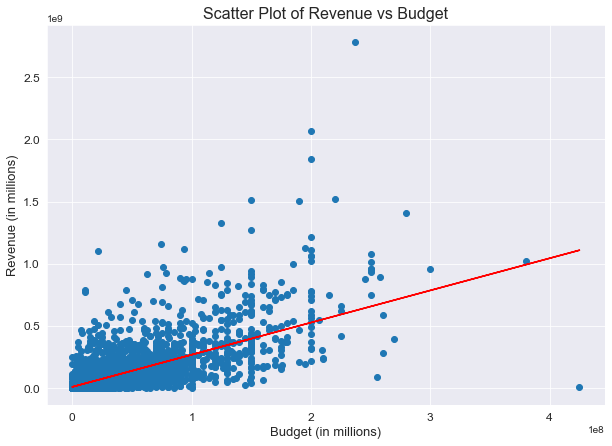

In [255]:
#revenue vs budget analysis
sns.set_style("darkgrid")
x=df_movie.budget
y=df_movie.revenue

#creating a trendline using numpy polyfit function
m, b = np.polyfit(x, y, 1)

#scatter plot and trendline of revenue vs budget
plt.figure(figsize=(10,7))

#plotting the trendline y = mx +b
plt.plot(x, m*x + b, color='r') 
plt.scatter(x,y,marker='o')

#set x-axis and y-axis labels, title, and fonts
plt.ylabel('Revenue (in millions)', fontsize=13)
plt.xlabel('Budget (in millions)',fontsize=13)
plt.title('Scatter Plot of Revenue vs Budget',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### Research Question 2: Which Movies Have the Shortest and Longest Runtimes?

Finding the movies with longest and shortest runtime:

In [303]:
#sorting the data by runtime in descending order
df_run=df_movie.sort_values(by=['runtime'],ascending=False)
#Converting movie title and runtime columns to pandas series
series_title=pd.Series(data=df_run['original_title'], index=None, dtype=str)
series_run= pd.Series(data=df_run['runtime'], index=None, dtype=int)

Movie with the longest runtime:

In [302]:
#find and display the title and runtime of the movie with longest runtime
title_max=series_title.head(1).to_string()
runtime_max=series_run.max()
print("Movie with the Longest Runtime:" + title_max)
print ("Longest Runtime: " + str(runtime_max)+ " minutes")

Movie with Longest Runtime:3894    The Story of Film: An Odyssey
Longest Runtime: 900.0 minutes


Movie with the shortest runtime:

In [301]:
#find and display the title and runtime of the movie with longest runtime
title_min=series_title.tail(1).to_string()
runtime_min=series_run.min()
print("Movie with the Shortest Runtime:" + title_min)
print ("Shortest Runtime: " + str(int(runtime_min)) + " minutes")

Movie with Shortest Runtime:8874    Mission Kashmir
Shortest Runtime: 2 minutes


The movie with the longest runtime is **____**,  with a runtime of **__** minutes, or **__** hours.

The movie with the shortest runtime is **____**, with a runtime of **__** minutes.


### Research Question 3: How Does Runtime Influence the Popularity of  a Movie?

The second research question in this analysis will look at how popularity of a movie is related to its runtime.

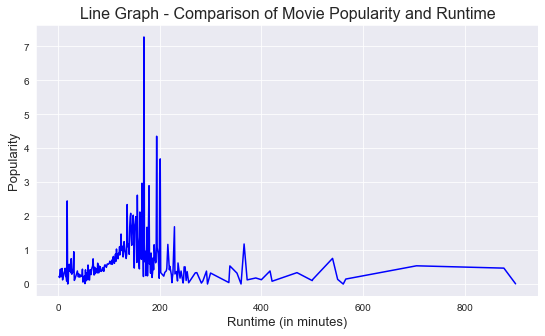

In [307]:
#runtime vs popularity
sns.set_style("darkgrid")
df_movie.groupby('runtime')['popularity'].mean().plot(figsize = (9,5),color='b')
plt.xlabel('Runtime (in minutes)',fontsize=13)
plt.ylabel('Popularity', fontsize=13)
plt.title('Line Graph - Comparison of Movie Popularity and Runtime',fontsize=16);

From this line graph, it can be seen that the most popular movies have a runtime between 100 and 200 minutes, after which the popularity value decreases sharply below 1. 

There are also a few outliers in this chart, where movies with runtime over 200 minutes (over 3 hours) have a high popularity among audiences.

### Research Question 4: Who are the Top 5 Directors Who Directed the Most Number of Movies?

This analysis is to find names of the top 5 directors who have made the most movies and plot this information.

In [311]:
#count the number of movies made by each director and sort by descending order
movie_count=df_movie.value_counts('director', ascending=False)
movie_count.dtype
#select the top 5 values in this array
movie_count=movie_count[:5]
print(movie_count)

director
Woody Allen         45
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     29
Ridley Scott        23
dtype: int64


Now that I found the top 5 directors who made the most movies and the number of movies each of them has directed, I will plot this information in the form of a bar graph.

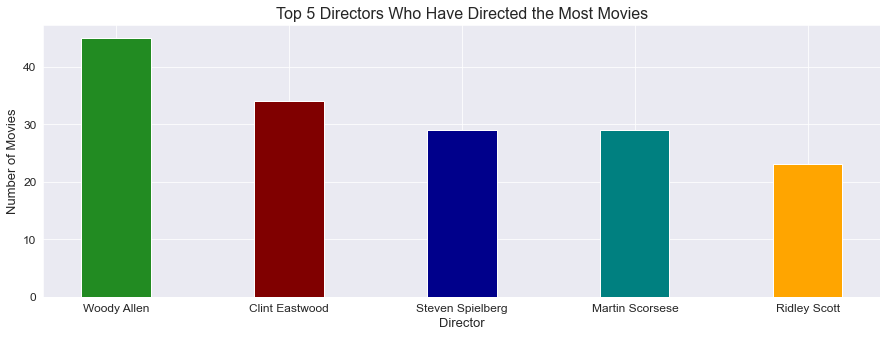

In [312]:
# bar graph for top 5 directors who made the most movies
sns.set_style("darkgrid")
names=['Woody Allen','Clint Eastwood','Steven Spielberg','Martin Scorsese','Ridley Scott']

plt.figure(figsize=(15,5))
plt.bar(names,movie_count,width = 0.4, color=['forestgreen', 'maroon', 'darkblue', 'teal', 'orange'])

plt.xlabel('Director',fontsize=13)
plt.ylabel('Number of Movies',fontsize=13)
plt.title('Top 5 Directors Who Have Directed the Most Movies',fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### Research Question 5: Which Genre Has the Highest Number of Movie Releases?

To find the number of movies made by genre by using the <i>**value_counts()**</i> method:

In [154]:
df_movie.value_counts('genres')

genres
Drama                                    566
Comedy                                   525
Drama|Romance                            248
Comedy|Drama                             233
Comedy|Romance                           223
                                        ... 
Drama|Comedy|Science Fiction|Romance       1
Drama|Comedy|Science Fiction               1
Drama|Comedy|Romance|Science Fiction       1
Action|Fantasy|Comedy|Science Fiction      1
Western|Thriller                           1
Length: 1783, dtype: int64

However, the data in the **genres** column contains multiple values separated by the **'|'** character, meaning that movies can have multiple genres. <br>

So, in order to get a count of all the movies belonging to a particular genre, the data has to be split along the **'|'** separator.

In [314]:
#concatenate all the rows of the genres.
concat = df_movie['genres'].str.cat(sep = '|')
genre = pd.Series(concat.split('|'))
#counts each of genre 
counts = genre.value_counts(ascending=False)
print(counts)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


After splitting the genre column along the **'|'** separator, plot a pie chart to find the percentage of movies released for each genre.

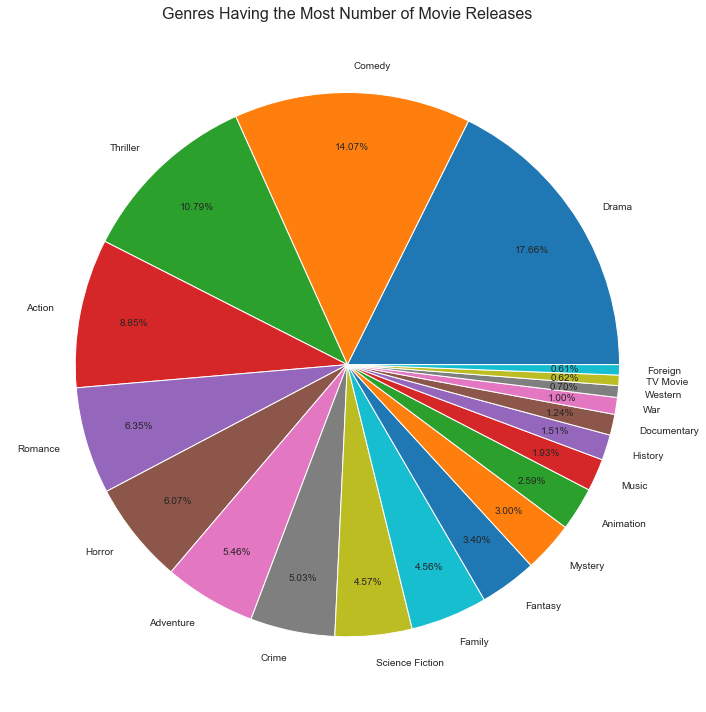

In [315]:
#plotting pie chart of movies by genre
plt.figure(figsize=(10,10))
label=['Drama','Comedy','Thriller','Action','Romance','Horror','Adventure','Crime','Science Fiction','Family','Fantasy','Mystery','Animation','Music','History','Documentary','War','Western','TV Movie','Foreign']    
plt.pie(counts, explode=None, labels=label, colors=None, autopct='%.2f%%', shadow=False, pctdistance=0.8)
plt.title('Genres Having the Most Number of Movie Releases',fontsize=16)
plt.tight_layout();

From the pie chart, the top 5 genres with the most number of movies released are:
1. Drama
2. Comedy
3. Thriller
4. Action
5. Romance

### Research Question 6: How has Movie Runtime Changed Over the Years?

Plotting a line graph of movie runtime vs year to observe how average runtime has changed over time.

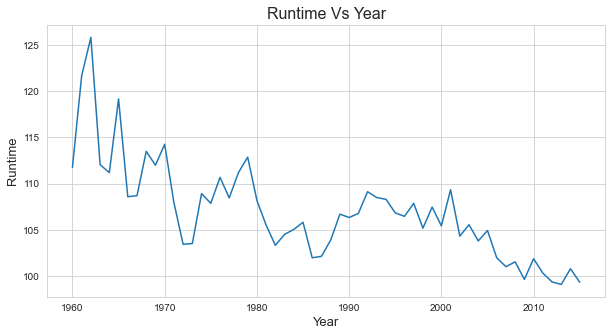

In [237]:
sns.set_style("whitegrid")
df_movie.groupby('release_year').mean()['runtime'].plot(figsize=(10,5))
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
plt.title("Line Graph - Runtime Vs Year",fontsize = 16);

From the line graph plotted above, it is observed that average movie runtime has steadily decreased from over 100 or 125 minutes in the 1960s, to less than 100 minutes in the 2010s.

This observation is noteworthy, because earlier analysis of runtime vs popularity showed that movies with runtime between 100 and 200 minutes were most popular with audiences.

<a id='conclusions'></a>
## Conclusions
1. High budget movies tend to make higher revenues.
2. Movies with runtime between 100 and 200 minutes are the most popular with audiences.
3. The most number of movies made are of the drama genre, followed by the comedy genre.
4. Movie runtime has steadily been decreasing to slightly under 100 minutes in recent years.
5. Woody Allen has made the most number of movies, followed by Clint Eastwood. 

In [316]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295